## Predicting stress using wearable sensors

### Importing necessary libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


### Load necessary data

The following datasets (ACC, BVP, EDA, HR, TEMP) will be used for this analysis.

**Load the ACC data**

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/Stress-Prediction-Project/main/Raw_data/S20/ACC.csv', header=None)
df
time = pd.to_datetime(df[0][0], unit = "s")
df

,0,1,2
0,1.646042e+09,1.646042e+09,1.646042e+09
1,3.200000e+01,3.200000e+01,3.200000e+01
2,7.000000e+00,-4.200000e+01,4.900000e+01
3,9.000000e+00,-3.900000e+01,5.300000e+01
4,2.300000e+01,-3.200000e+01,6.000000e+01
...,...,...,...
108645,-4.000000e+01,-4.600000e+01,2.000000e+01
108646,-4.100000e+01,-4.600000e+01,2.100000e+01
108647,-4.000000e+01,-4.600000e+01,2.000000e+01
108648,-3.900000e+01,-4.500000e+01,2.000000e+01


### Preprocess the ACC dataset

In [82]:
df_acc = df
#Drop columns the first nad second columns
df_acc = df_acc.drop(index=0)
df_acc = df_acc.drop(index=1)
x = len(df)

time_det = pd.Timedelta(1/32, unit='s')
df_acc['time']= pd.date_range(time, periods=x-2, freq= time_det)
#remove the time column
df_time = df_acc.pop('time')
#Insert a new timestamp feature
df_acc.insert(0, 'timestamp', df_time)
#Convert the new feature to a datetime feature
df_acc['timestamp'] = pd.to_datetime(df_acc['timestamp'])

In [83]:
#make the timestamp the index column
df_acc.set_index('timestamp', inplace=True)

In [84]:
#Resample the time-series data
df_acc = df_acc.resample('1T').mean()

In [85]:
#Rename the various data columns
df_acc= df_acc.rename(columns={0: 'ACC1'})
df_acc= df_acc.rename(columns={1: 'ACC2'})
df_acc= df_acc.rename(columns={2: 'ACC3'})

**Load the BVP data**

In [86]:
df_bvp= pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/Stress-Prediction-Project/main/Raw_data/S20/BVP.csv', header=None)

**Preprocess the BVP dataset**

In [87]:
x=len(df_bvp)
#Drop columns the first nad second columns
df_bvp=df_bvp.drop(index=0)
df_bvp=df_bvp.drop(index=1)
time_det = pd.Timedelta(1/64, unit='s')
df_bvp['time']= pd.date_range(time, periods=x-2, freq= time_det)
#remove the time column
df_time = df_bvp.pop('time')
#Insert a new timestamp feature
df_bvp.insert(0, 'timestamp', df_time)
#Convert the new feature to a datetime feature
df_bvp['timestamp'] = pd.to_datetime(df_bvp['timestamp'])
df_bvp.set_index('timestamp', inplace=True)
df_bvp = df_bvp.resample('1T').mean()

In [88]:
#Rename the various data columns
df_bvp= df_bvp.rename(columns={0: 'BVP'})

**Load the EDA data**

In [89]:
df_eda= pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/Stress-Prediction-Project/main/Raw_data/S20/EDA.csv', header=None)

**Preprocess the EDA dataset**

In [90]:
x=len(df_eda)
#Drop columns the first nad second columns
df_eda = df_eda.drop(index=0)
df_eda = df_eda.drop(index=1)
time_det = pd.Timedelta(1/4, unit='s')
df_eda['time']= pd.date_range(time, periods=x-2, freq= time_det)
#remove the time column
df_time = df_eda.pop('time')
#Insert a new timestamp feature
df_eda.insert(0, 'timestamp', df_time)
#Convert the new feature to a datetime feature
df_eda['timestamp'] = pd.to_datetime(df_eda['timestamp'])
df_eda.set_index('timestamp', inplace=True)
df_eda = df_eda.resample('1T').mean()

In [91]:
#Rename the necessary data columns
df_eda = df_eda.rename(columns={0: 'EDA'})

**Load the HR data**

In [92]:
df_hr= pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/Stress-Prediction-Project/main/Raw_data/S20/HR.csv',header=None)

**Preprocess the HR dataset**

In [93]:
x=len(df_hr)
#Drop columns the first nad second columns
df_hr=df_hr.drop(index=0)
df_hr=df_hr.drop(index=1)
time_det = pd.Timedelta(1/1, unit='s')
df_hr['time']= pd.date_range(time, periods=x-2, freq= time_det)
#remove the time column
df_time = df_hr.pop('time')
#Insert a new timestamp feature
df_hr.insert(0, 'timestamp', df_time)
#Convert the new feature to a datetime feature
df_hr['timestamp'] = pd.to_datetime(df_hr['timestamp'])
df_hr.set_index('timestamp', inplace=True)
df_hr = df_hr.resample('1T').mean()

In [94]:
#Rename the necessary data columns
df_hr=df_hr.rename(columns={0: 'HR'})

**Load the TEMP data**

In [95]:
df_temp= pd.read_csv('https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S20/TEMP.csv', header=None)

**Preprocess the TEMP dataset**

In [96]:
x=len(df_temp)
#Drop columns the first nad second columns
df_temp=df_temp.drop(index=0)
df_temp=df_temp.drop(index=1)
time_det = pd.Timedelta(1/4, unit='s')
df_temp['time']= pd.date_range(time, periods=x-2, freq= time_det)
#remove the time column
df_time = df_temp.pop('time')
#Insert a new timestamp feature
df_temp.insert(0, 'timestamp', df_time)
#Convert the new feature to a datetime feature
df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])
df_temp.set_index('timestamp', inplace=True)
df_temp = df_temp.resample('1T').mean()

In [97]:
#Rename the necessary data columns
df_temp=df_temp.rename(columns={0: 'TEMP'})

**COMBINING THE ENTIRE DATASET INTO A SINGLE DATASET**

In [98]:
combined_df= df_acc

In [99]:
combined_df = pd.merge(combined_df, df_bvp, on='timestamp')
combined_df = pd.merge(combined_df, df_eda, on='timestamp')
combined_df = pd.merge(combined_df, df_hr, on='timestamp')
combined_df = pd.merge(combined_df, df_temp, on='timestamp')
combined_df

,ACC1,ACC2,ACC3,BVP,EDA,HR,TEMP
timestamp,,,,,,,
2022-02-28 09:49:00,-33.934659,-31.250000,33.343750,-0.789645,0.628223,84.706364,32.899091
2022-02-28 09:50:00,-29.775521,-15.627083,48.223958,-0.074966,0.691737,99.424667,32.960667
2022-02-28 09:51:00,-21.594271,-18.602083,55.731250,-0.002398,0.725548,83.000667,33.063333
2022-02-28 09:52:00,-22.808333,-25.182813,53.902083,0.210742,0.769749,82.622500,33.084667
2022-02-28 09:53:00,-28.241146,-22.500521,51.515104,0.148409,0.785664,83.176667,33.080667
2022-02-28 09:54:00,-29.007812,-21.217188,52.939583,-0.199180,0.736290,81.178667,33.039000
2022-02-28 09:55:00,-29.151042,-13.549479,42.264583,-0.793617,0.799721,80.497000,32.982167
2022-02-28 09:56:00,-45.137500,-42.958333,-1.283854,0.743409,1.027090,91.155500,32.743000
2022-02-28 09:57:00,-45.096354,-34.924479,0.047396,0.222102,1.158093,84.071333,32.550833


In [100]:
combined_df['Patient']= '20'
combined_df

,ACC1,ACC2,ACC3,BVP,EDA,HR,TEMP,Patient
timestamp,,,,,,,,
2022-02-28 09:49:00,-33.934659,-31.250000,33.343750,-0.789645,0.628223,84.706364,32.899091,20
2022-02-28 09:50:00,-29.775521,-15.627083,48.223958,-0.074966,0.691737,99.424667,32.960667,20
2022-02-28 09:51:00,-21.594271,-18.602083,55.731250,-0.002398,0.725548,83.000667,33.063333,20
2022-02-28 09:52:00,-22.808333,-25.182813,53.902083,0.210742,0.769749,82.622500,33.084667,20
2022-02-28 09:53:00,-28.241146,-22.500521,51.515104,0.148409,0.785664,83.176667,33.080667,20
2022-02-28 09:54:00,-29.007812,-21.217188,52.939583,-0.199180,0.736290,81.178667,33.039000,20
2022-02-28 09:55:00,-29.151042,-13.549479,42.264583,-0.793617,0.799721,80.497000,32.982167,20
2022-02-28 09:56:00,-45.137500,-42.958333,-1.283854,0.743409,1.027090,91.155500,32.743000,20
2022-02-28 09:57:00,-45.096354,-34.924479,0.047396,0.222102,1.158093,84.071333,32.550833,20


In [101]:
combined_df['Label']= 'stress'
combined_df

,ACC1,ACC2,ACC3,BVP,EDA,HR,TEMP,Patient,Label
timestamp,,,,,,,,,
2022-02-28 09:49:00,-33.934659,-31.250000,33.343750,-0.789645,0.628223,84.706364,32.899091,20,stress
2022-02-28 09:50:00,-29.775521,-15.627083,48.223958,-0.074966,0.691737,99.424667,32.960667,20,stress
2022-02-28 09:51:00,-21.594271,-18.602083,55.731250,-0.002398,0.725548,83.000667,33.063333,20,stress
2022-02-28 09:52:00,-22.808333,-25.182813,53.902083,0.210742,0.769749,82.622500,33.084667,20,stress
2022-02-28 09:53:00,-28.241146,-22.500521,51.515104,0.148409,0.785664,83.176667,33.080667,20,stress
2022-02-28 09:54:00,-29.007812,-21.217188,52.939583,-0.199180,0.736290,81.178667,33.039000,20,stress
2022-02-28 09:55:00,-29.151042,-13.549479,42.264583,-0.793617,0.799721,80.497000,32.982167,20,stress
2022-02-28 09:56:00,-45.137500,-42.958333,-1.283854,0.743409,1.027090,91.155500,32.743000,20,stress
2022-02-28 09:57:00,-45.096354,-34.924479,0.047396,0.222102,1.158093,84.071333,32.550833,20,stress


In [102]:
target_label= pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/Stress-Prediction-Project/main/Raw_data/S20/tags_S20.csv', header=None)
target_label
y=pd.to_datetime(target_label[0][0], unit="s")
y

Timestamp('2022-02-28 10:00:41')

In [103]:
combined_df.loc[(combined_df.index < pd.to_datetime(target_label[0][0], unit="s")), 'Label'] = 'No stress'
combined_df.loc[(combined_df.index > pd.to_datetime(target_label[0][1], unit="s")) & (combined_df.index <= pd.to_datetime(target_label[0][2], unit="s")), 'Label'] = 'No stress'
combined_df.loc[(combined_df.index >= pd.to_datetime(target_label[0][3], unit="s")) & (combined_df.index <= pd.to_datetime(target_label[0][4], unit="s")), 'Label'] = 'No stress'
combined_df.loc[(combined_df.index >= pd.to_datetime(target_label[0][5], unit="s")) & (combined_df.index <= pd.to_datetime(target_label[0][6], unit="s")), 'Label'] = 'No stress'
combined_df.loc[(combined_df.index >= (pd.to_datetime(target_label[0][6], unit="s")+ pd.Timedelta(minutes=5))), 'Label'] = 'No stress'

In [104]:
combined_df

,ACC1,ACC2,ACC3,BVP,EDA,HR,TEMP,Patient,Label
timestamp,,,,,,,,,
2022-02-28 09:49:00,-33.934659,-31.250000,33.343750,-0.789645,0.628223,84.706364,32.899091,20,No stress
2022-02-28 09:50:00,-29.775521,-15.627083,48.223958,-0.074966,0.691737,99.424667,32.960667,20,No stress
2022-02-28 09:51:00,-21.594271,-18.602083,55.731250,-0.002398,0.725548,83.000667,33.063333,20,No stress
2022-02-28 09:52:00,-22.808333,-25.182813,53.902083,0.210742,0.769749,82.622500,33.084667,20,No stress
2022-02-28 09:53:00,-28.241146,-22.500521,51.515104,0.148409,0.785664,83.176667,33.080667,20,No stress
2022-02-28 09:54:00,-29.007812,-21.217188,52.939583,-0.199180,0.736290,81.178667,33.039000,20,No stress
2022-02-28 09:55:00,-29.151042,-13.549479,42.264583,-0.793617,0.799721,80.497000,32.982167,20,No stress
2022-02-28 09:56:00,-45.137500,-42.958333,-1.283854,0.743409,1.027090,91.155500,32.743000,20,No stress
2022-02-28 09:57:00,-45.096354,-34.924479,0.047396,0.222102,1.158093,84.071333,32.550833,20,No stress


**Import matplotlib for plotting of graph**

In [105]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Value')

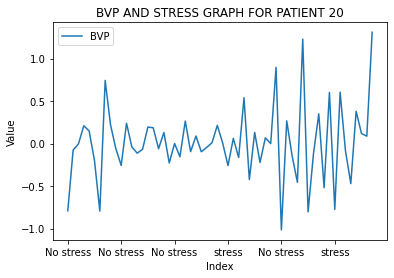

In [106]:
combined_df.plot(x ='Label', y ='BVP', kind='line')
plt.title('BVP AND STRESS GRAPH FOR PATIENT 20')
plt.xlabel('Index')
plt.ylabel('Value')

**MODELING MACHINE LEARNING ALGORITHM FOR PREDICTING STRESS**

Three machine learning models will be trained and deployed to predict or measure whether a participant was stressed or not.

In [107]:
#separate the label column
model_x = combined_df
model_x.reset_index(drop=True, inplace=True)

In [108]:
#Encode the label column for models to utilize
label_encoder = LabelEncoder()
label = model_x['Label']
label = label_encoder.fit_transform(label)
model_x['Label']= label
X = model_x.drop(labels=['Patient','Label','TEMP'], axis=1)
y = model_x['Label']

In [109]:
#Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Modeling Logistic Regression Algorithm**

In [110]:
log= LogisticRegression()
LRacc_score = []

In [111]:
n = TimeSeriesSplit(n_splits =2) 
for train_index, test_index in n.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_test = scaler.transform(X_test)
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    LRacc_score.append([f'acc:{acc}'])

In [112]:
LRacc_score

[['acc:0.47368421052631576'], ['acc:0.631578947368421']]

**Cross Validation**

In [113]:
 # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
score = cross_val_score(log, X, y, cv=5)
print("Cross validation is",np.mean(score))

Cross validation is 0.6515151515151516


**MODELING RANDOM FOREST ALGORITHM**

In [114]:
rnd = RandomForestClassifier()
rndacc_score = []
n = TimeSeriesSplit(n_splits =2)
for train_index, test_index in n.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_test = scaler.transform(X_test)
    rnd.fit(X_train, y_train)
    y_pred = rnd.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rndacc_score.append([f'acc: {acc}'])
   

In [115]:
rndacc_score

[['acc: 0.47368421052631576'], ['acc: 0.631578947368421']]

**Cross Validation**

In [116]:
 # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
score = cross_val_score(rnd, X, y, cv=5)
print("Cross validation is",np.mean(score))

Cross validation is 0.6893939393939393


**MODELING DECISION TREE ALGORITHM**

In [117]:
dct = DecisionTreeClassifier()
DTacc_score = []
n = TimeSeriesSplit(n_splits =2)
for train_index, test_index in n.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_test = scaler.transform(X_test)
    dct.fit(X_train, y_train)
    y_pred = dct.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    DTacc_score.append([f'acc: {acc}'])

In [118]:
DTacc_score

[['acc: 0.5789473684210527'], ['acc: 0.5789473684210527']]

**Use Cross Validation**

In [119]:
 # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
score = cross_val_score(dct, X, y, cv=5)
print("Cross validation is",np.mean(score))

Cross validation is 0.6196969696969696
